In [12]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Load
df_vqc = pd.read_csv("mlb_vqc_features.csv")

# Separate X and y
X_train = df_vqc.drop(columns=["y"])
y_train = df_vqc["y"].astype(int).to_numpy()

In [13]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [17]:
clf.fit(X_train, y_train)

c:\Users\danes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(5, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,1e-05
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,1


In [15]:
X_test = pd.read_csv("postseason_test_processed.csv")

y_test = np.array([1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,0,1])

In [16]:
y_pred_test = clf.predict(X_test)
test_acc_test = (y_pred_test == y_test).mean()
print(f"Test accuracy (MLPClassifier): {test_acc_test:.3f}")

Test accuracy (MLPClassifier): 0.511


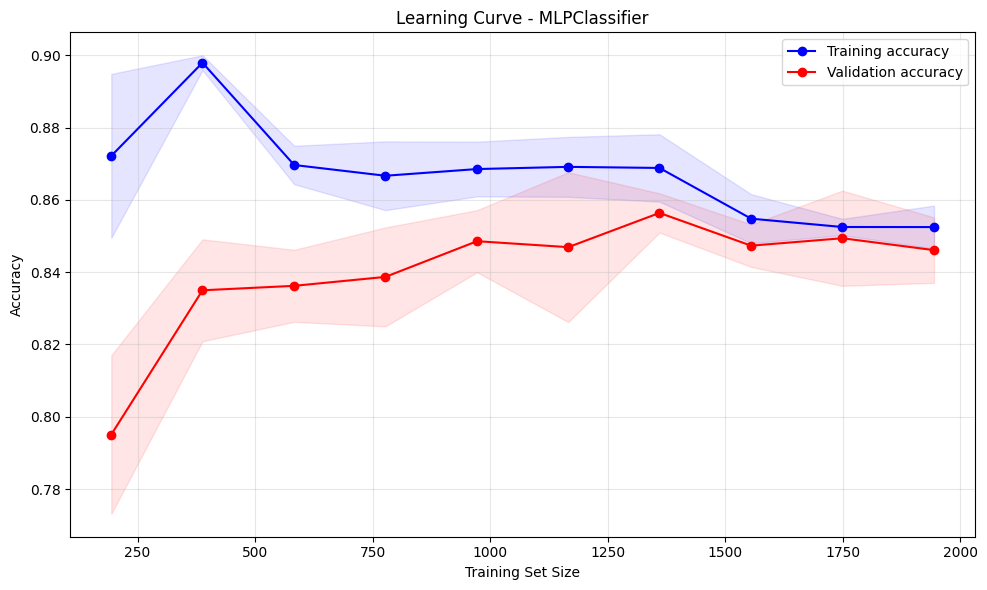

Final training accuracy: 0.852 ± 0.006
Final validation accuracy: 0.846 ± 0.009


In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    clf, 
    X_train, 
    y_train,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # use all processors
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different training set sizes
    scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation accuracy')

# Add shaded regions for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - MLPClassifier')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training accuracy: {train_mean[-1]:.3f} ± {train_std[-1]:.3f}")
print(f"Final validation accuracy: {test_mean[-1]:.3f} ± {test_std[-1]:.3f}")
